<a href="https://colab.research.google.com/github/swapniladnak2510/Plant-disease-classification-/blob/main/Plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d emmarex/plantdisease

 97% 638M/658M [00:06<00:00, 99.4MB/s]
100% 658M/658M [00:06<00:00, 109MB/s] 


In [ ]:
! unzip /content/plantdisease.zip

In [ ]:
from glob import glob
import matplotlib.pyplot as plt
import cv2
import os
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

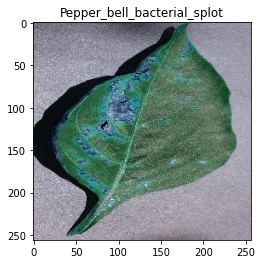

In [ ]:
plt.title('Pepper_bell_bacterial_splot')
plt.imshow(cv2.imread('/content/PlantVillage/Pepper__bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG'))

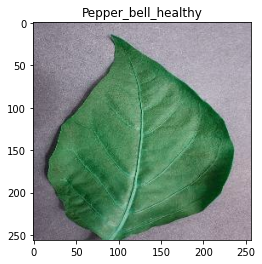

In [ ]:
plt.title('Pepper_bell_healthy')
plt.imshow(cv2.imread('/content/PlantVillage/Pepper__bell___healthy/016c8a9f-8eab-41b2-bb4b-0eb6ed0b2a7d___JR_HL 8591.JPG'))

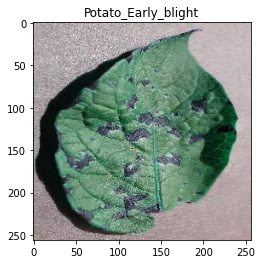

In [ ]:
plt.title('Potato_Early_blight')
plt.imshow(cv2.imread('/content/PlantVillage/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG'))

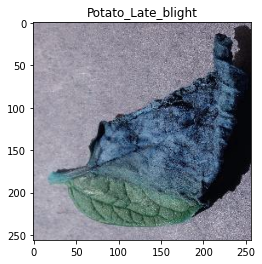

In [ ]:
plt.title('Potato_Late_blight')
plt.imshow(cv2.imread('/content/PlantVillage/Potato___Late_blight/0114b195-844c-4978-93a9-b0d5aae010f1___RS_LB 2738.JPG'))

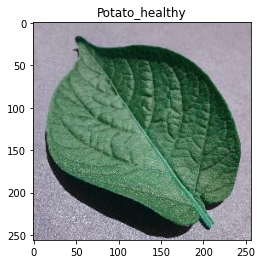

In [ ]:
plt.title('Potato_healthy')
plt.imshow(cv2.imread('/content/PlantVillage/Potato___healthy/0b3e5032-8ae8-49ac-8157-a1cac3df01dd___RS_HL 1817.JPG'))

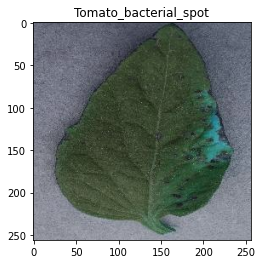

In [ ]:
plt.title('Tomato_bacterial_spot')
plt.imshow(cv2.imread('/content/PlantVillage/Tomato_Bacterial_spot/01375198-62af-4c40-bddf-f3c11107200b___GCREC_Bact.Sp 5914.JPG'))

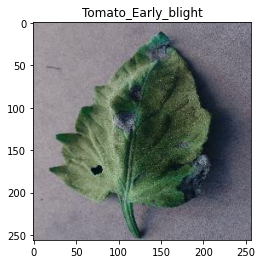

In [ ]:
plt.title('Tomato_Early_blight')
plt.imshow(cv2.imread('/content/PlantVillage/Tomato_Early_blight/0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437.JPG'))

In [ ]:
print('Name of disease and number of images available respectively')
print()
for i in glob('/content/PlantVillage/*'):
  print(i[22:]+" : "+str(len((os.listdir(i)))))

Name of disease and number of images available respectively

Tomato_Early_blight : 1000
Potato___healthy : 152
Tomato_Spider_mites_Two_spotted_spider_mite : 1676
Potato___Early_blight : 1000
Tomato_healthy : 1591
Tomato__Tomato_YellowLeaf__Curl_Virus : 3209
Tomato__Tomato_mosaic_virus : 373
Tomato__Target_Spot : 1404
Pepper__bell___Bacterial_spot : 997
Tomato_Leaf_Mold : 952
Tomato_Septoria_leaf_spot : 1771
Tomato_Bacterial_spot : 2127
Tomato_Late_blight : 1909
Pepper__bell___healthy : 1478
Potato___Late_blight : 1000


In [ ]:
dir='/content/PlantVillage/'

In [ ]:
data=ImageDataGenerator(rescale=1./255,
                        zoom_range=0.5,
                        horizontal_flip=True,
                        fill_mode='nearest',
                        validation_split=0.3)

In [ ]:
train=data.flow_from_directory(
    dir,
    color_mode='rgb',
    target_size=(150,150),
    subset='training')

Found 14452 images belonging to 15 classes.


In [ ]:
test=data.flow_from_directory(
    dir,
    color_mode='rgb',
    target_size=(150,150),
    subset='validation')

Found 6186 images belonging to 15 classes.


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=([150,150,3]),padding='same'),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(15,activation='softmax') 
])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 50, 50, 128)       512       
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 16, 16, 128)     

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy')

In [ ]:
scr=model.fit(train,epochs=20,validation_data=test)

Epoch 1/20
452/452 [==============================] - 136s 298ms/step - loss: 1.6570 - accuracy: 0.4656 - val_loss: 3.0295 - val_accuracy: 0.2428
Epoch 2/20
452/452 [==============================] - 136s 302ms/step - loss: 0.8195 - accuracy: 0.7255 - val_loss: 4.0488 - val_accuracy: 0.2898
Epoch 3/20
452/452 [==============================] - 134s 296ms/step - loss: 0.6288 - accuracy: 0.7889 - val_loss: 1.6072 - val_accuracy: 0.6140
Epoch 4/20
452/452 [==============================] - 134s 296ms/step - loss: 0.5001 - accuracy: 0.8271 - val_loss: 2.4842 - val_accuracy: 0.5215
Epoch 5/20
452/452 [==============================] - 135s 298ms/step - loss: 0.4011 - accuracy: 0.8641 - val_loss: 0.6804 - val_accuracy: 0.7919
Epoch 6/20
452/452 [==============================] - 133s 295ms/step - loss: 0.3726 - accuracy: 0.8682 - val_loss: 0.5134 - val_accuracy: 0.8487
Epoch 7/20
452/452 [==============================] - 132s 292ms/step - loss: 0.3229 - accuracy: 0.8899 - val_loss: 0.9978 -

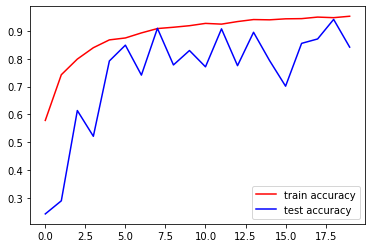

In [ ]:
acc=scr.history['accuracy']
val_acc=scr.history['val_accuracy']
plt.plot(acc,'r',label='train accuracy')
plt.plot(val_acc,'b',label='test accuracy')
plt.legend()

In [ ]:
model.evaluate(test)

194/194 [==============================] - 37s 192ms/step - loss: 0.7617 - accuracy: 0.8443


[0.7616872787475586, 0.8443259000778198]